In [1]:
import os
import glob
os.getcwd()

'/home/xchen/Projects/XMutant/DeepJanus-MNIST/data_analysis'

In [2]:
run_path = os.path.join("..", "runs_server", "runs_4000_AT_4")
assert os.path.exists(run_path), f"run_oath path {run_path} does not exist"

In [11]:
import pandas as pd
import json

def convert_timestamp_to_seconds(timestamp):
    """covert '0:00:54.982889' to seconds"""
    return pd.to_timedelta(timestamp).total_seconds()

file_name = glob.glob(os.path.join(run_path, f"MNIST_02-*"))
print(f"Found {len(file_name)} folders")
df_all = None

for file in file_name:
    print(file)

    config_json = os.path.join(file, "config.json")
    with open(config_json, "r") as f:
        config = json.load(f)
        # print(config)
    df_csv = pd.read_csv(os.path.join(file, "stats.csv"), header=0, names=["run",  "iteration",  "timestamp", "archive_len", "sparseness"],usecols=range(5))# , header=None

    df_csv["timestamp_seconds"] = df_csv["timestamp"].apply(convert_timestamp_to_seconds)
    df_csv.drop(columns=["run", "timestamp"], inplace=True)

    df_csv["xmutant_config"] = f"{config['xmutant_xai']}_{config['xmutant_selection']}_{config['xmutant_direction']}"
    df_csv["archive_threshold"] = config["archive tshd"]

    if df_all is None:
        df_all = df_csv
    else:
        df_all = pd.concat([df_all, df_csv], ignore_index=True)

#         df_summary = df_summary.merge(df_csv, on=["iteration",'xmutant_config', "archive_threshold"] , suffixes=("", "_new"))
#         # update
#         df_summary["archive_len"] += df_summary["archive_len_new"]
#         df_summary["timestamp_seconds"] += df_summary["timestamp_seconds_new"]
#         df_summary.drop(columns=["archive_len_new", "timestamp_seconds_new"], inplace=True)
# #

Found 30 folders
../runs_server/runs_4000_AT_4/MNIST_02-20_22-24_label_3_gen_4000_AT_4.0_SmoothGrad
../runs_server/runs_4000_AT_4/MNIST_02-21_03-15_label_8_gen_4000_AT_4.0_SmoothGrad
../runs_server/runs_4000_AT_4/MNIST_02-20_22-04_label_2_gen_4000_AT_4.0_SmoothGrad
../runs_server/runs_4000_AT_4/MNIST_02-20_20-12_label_5_gen_4000_AT_4.0_None
../runs_server/runs_4000_AT_4/MNIST_02-21_02-41_label_6_gen_4000_AT_4.0_SmoothGrad
../runs_server/runs_4000_AT_4/MNIST_02-20_23-27_label_6_gen_4000_AT_4.0_SmoothGrad
../runs_server/runs_4000_AT_4/MNIST_02-20_23-06_label_5_gen_4000_AT_4.0_SmoothGrad
../runs_server/runs_4000_AT_4/MNIST_02-21_00-31_label_9_gen_4000_AT_4.0_SmoothGrad
../runs_server/runs_4000_AT_4/MNIST_02-21_01-11_label_1_gen_4000_AT_4.0_SmoothGrad
../runs_server/runs_4000_AT_4/MNIST_02-20_20-24_label_6_gen_4000_AT_4.0_None
../runs_server/runs_4000_AT_4/MNIST_02-20_19-12_label_0_gen_4000_AT_4.0_None
../runs_server/runs_4000_AT_4/MNIST_02-20_21-18_label_0_gen_4000_AT_4.0_SmoothGrad
../ru

In [12]:
df_summary = df_all.groupby(["iteration", "xmutant_config", "archive_threshold"], as_index=False).agg(
    archieve_sum=("archive_len", "sum"),
    sparseness_avg=("sparseness", "mean"),
    timestamp_sum=("timestamp_seconds", "sum")
)


In [13]:
df_summary

iteration                         xmutant_config archive_threshold  \
0            10                     None_random_random               4.0   
1            10     SmoothGrad_clustering_random_cycle               4.0   
2            10  SmoothGrad_clustering_toward_centroid               4.0   
3            20                     None_random_random               4.0   
4            20     SmoothGrad_clustering_random_cycle               4.0   
...         ...                                    ...               ...   
1195       3990     SmoothGrad_clustering_random_cycle               4.0   
1196       3990  SmoothGrad_clustering_toward_centroid               4.0   
1197       4000                     None_random_random               4.0   
1198       4000     SmoothGrad_clustering_random_cycle               4.0   
1199       4000  SmoothGrad_clustering_toward_centroid               4.0   

      archieve_sum  sparseness_avg  timestamp_sum  
0               10        3.072729       9.787166  
1               12        4.343317      27.339194  
2               10        4.269417      27.954892  
3               14        4.194188      16.118630  
4               21        6.158245      52.415016  
...            ...             ...            ...  
1195           737        8.199915   12846.627275  
1196           222        8.488917   10731.175763  
1197          1083        9.865964    7569.226648  
1198           737        8.197843   12881.887904  
1199           223        8.474521   10756.357949  

[1200 rows x 6 columns]

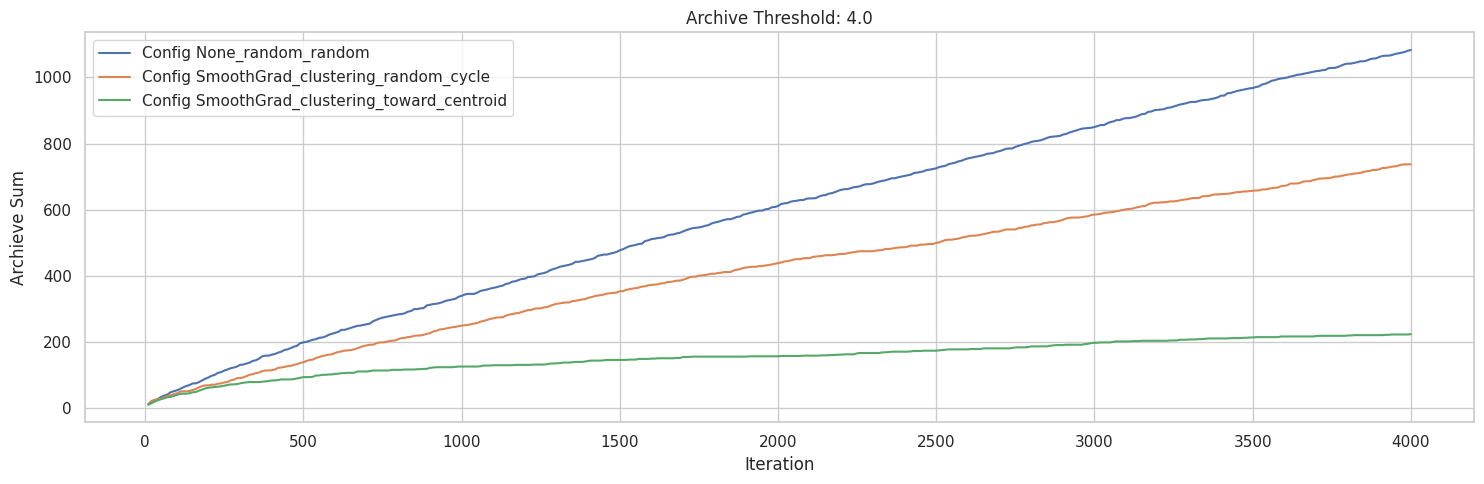

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Get unique archive_threshold values
# archive_thresholds = df_summary["archive_threshold"].unique()
configs = df_summary["xmutant_config"].unique()  # Get unique config values

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))

# Loop through each archive_threshold and plot
# for i, threshold in enumerate(archive_thresholds):
#ax = axes[0,i] if len(archive_thresholds) > 1 else axes  # Support single plot case
#df_subset = df_summary[df_summary["archive_threshold"] == threshold]

# Plot for each config
for config in configs:
    df_config = df_summary[df_summary["xmutant_config"] == config]
    plt.plot(df_config["iteration"], df_config["archieve_sum"], label=f"Config {config}")

plt.title(f"Archive Threshold: {4.0}")
plt.xlabel("Iteration")
# if i == 0:
plt.ylabel("Archieve Sum")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [10]:
configs

array(['None_random_random', 'SmoothGrad_clustering_random_cycle'],
      dtype=object)

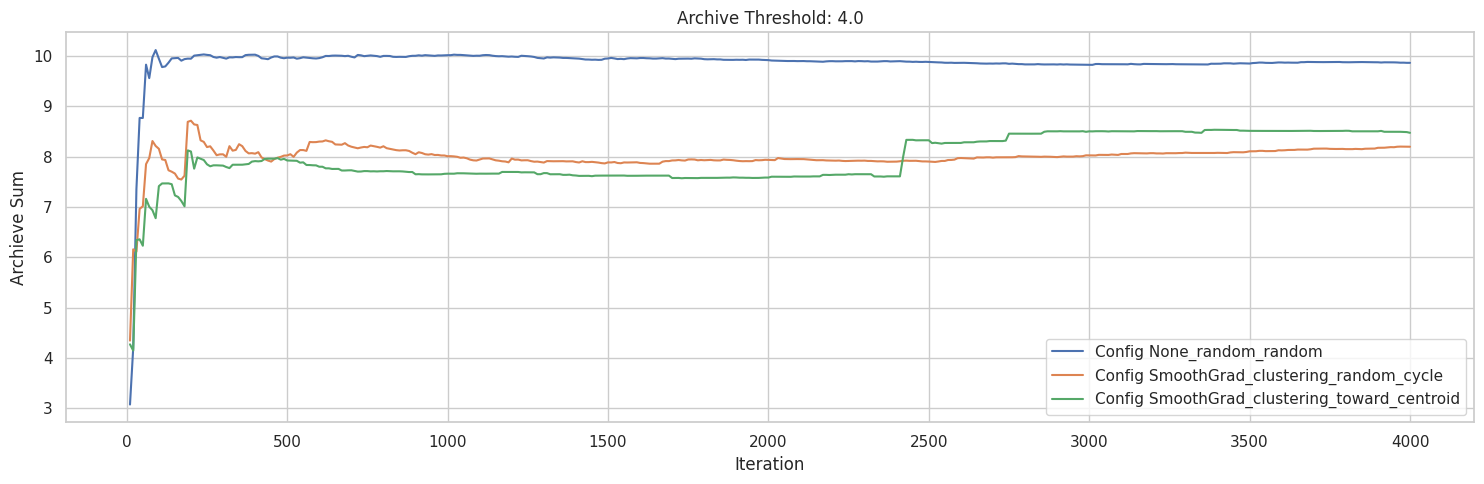

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Get unique archive_threshold values
# archive_thresholds = df_summary["archive_threshold"].unique()
configs = df_summary["xmutant_config"].unique()  # Get unique config values

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))

# Loop through each archive_threshold and plot
# for i, threshold in enumerate(archive_thresholds):
#ax = axes[0,i] if len(archive_thresholds) > 1 else axes  # Support single plot case
#df_subset = df_summary[df_summary["archive_threshold"] == threshold]

# Plot for each config
for config in configs:
    df_config = df_summary[df_summary["xmutant_config"] == config]
    plt.plot(df_config["iteration"], df_config["sparseness_avg"], label=f"Config {config}")

plt.title(f"Archive Threshold: {4.0}")
plt.xlabel("Iteration")
# if i == 0:
plt.ylabel("Archieve Sum")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
